In [23]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
from matplotlib.ticker import MaxNLocator

# Define style
sns.set_palette("deep")
sns.set_style('whitegrid')
sns.set_context("paper", font_scale = 2)

In [24]:
html_pypy_df = pd.read_csv("dynamic-html-pypy.csv")
html_jvm_df = pd.read_csv("dynamic-html-jvm.csv")

html_pypy = html_pypy_df.to_numpy()
html_jvm = html_jvm_df.iloc[:,1].to_numpy()

In [25]:
# Define a function called timeseries_plot
def lineplot1(axes, x, y, xlabel, ylabel):

  # Plot the inputs x, y in the provided color
  axes.plot(x, y, color="black", linewidth=5, linestyle="--")

  # Set the x-axis label
  axes.set_xlabel(xlabel, fontsize = 100, labelpad=75, fontweight='bold')

  # Set the y-axis label
  axes.set_ylabel(ylabel, fontsize = 100, labelpad=75, fontweight='bold')
    
  axes.set_ylim([0, 10 ** 4]) 

  axes.set_yticks([2500, 5000, 7500, 10000]) 

In [26]:
# Define a function called timeseries_plot
def lineplot2(axes, x, y, xlabel, ylabel):

  # Plot the inputs x, y in the provided color
  axes.plot(x, y, color="black", linewidth=5, linestyle="--")

  # Set the x-axis label
  axes.set_xlabel(xlabel, fontsize = 100, labelpad=75, fontweight='bold')

  # Set the y-axis label
  axes.set_ylabel(ylabel, fontsize = 100, labelpad=75, fontweight='bold')
    
  axes.set_ylim([0, 2250]) 

  axes.set_yticks([500, 1000, 1500, 2000]) 

In [6]:
kernel_size = 5
kernel = np.ones(kernel_size) / kernel_size
pypy_convolved = np.convolve(np.median(html_pypy, axis=1), kernel, mode="valid")
jvm_convolved = np.convolve(html_jvm, kernel, mode="valid")

In [7]:
pypy_convolved[977]

3464.5

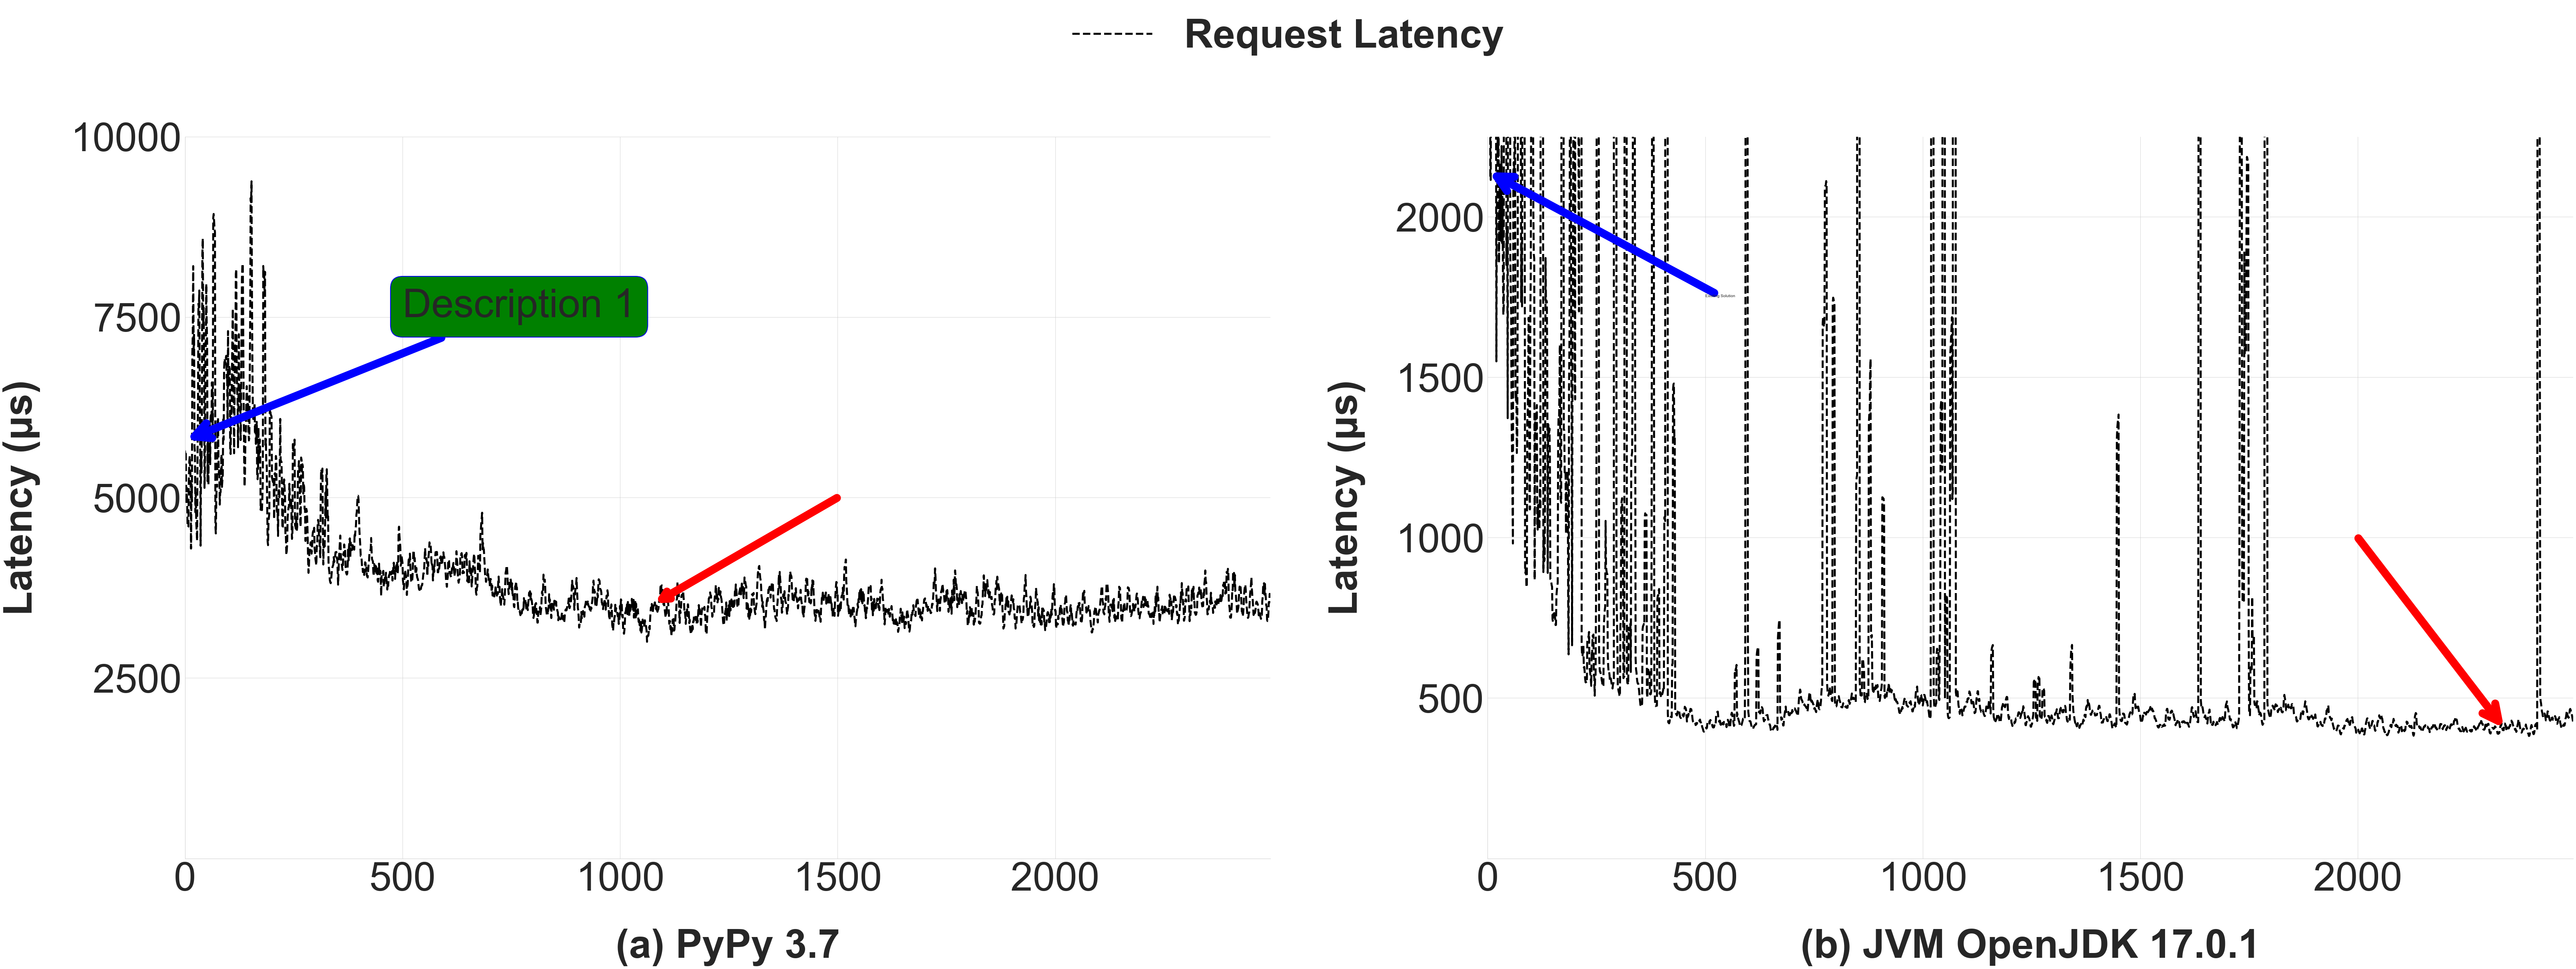

In [7]:
# setting figure and axis objects
fig, axes = plt.subplots(1, 2, figsize=(90, 30))

font_size = 100

legend = {"handles": None, "labels": None}

# Defining box style for annotation
bbox_props = dict(boxstyle="round,pad=0.3", fc="green", ec="b", lw=2)


lineplot1(axes[0], range(0, 2496), pypy_convolved, "(a) PyPy 3.7", "Latency (μs)")
# interval_existing_py = matplotlib.patches.Rectangle((1,0), 101, 10000, color='lightcoral')
# interval_pronghorn_py = matplotlib.patches.Rectangle((977,0), 100, 10000, color='turquoise')
# axes[0].add_patch(interval_existing_py)
# axes[0].add_patch(interval_pronghorn_py)
xmin = 1
xmax = 1077
y = np.median(pypy_convolved[1:101])
axes[0].annotate('Description 1', xy=(1, np.median(pypy_convolved[1:101])), 
                 xytext=(500, 7500), 
                 arrowprops=dict(arrowstyle='->', lw=20, color='blue', mutation_scale=100),
                 fontsize=font_size,
                 bbox=bbox_props)
y = np.median(pypy_convolved[967:977])
axes[0].annotate('', xy=(xmax, y), xytext=(1500, 5000), arrowprops=dict(arrowstyle='->', lw=20, color='red', mutation_scale=50))
# axes[0].hlines(y=[np.median(pypy_convolved[1:101])], xmin=[1], xmax=[1077], colors='purple', linestyles='--', lw=10, label='')
# axes[0].hlines(y=[np.median(pypy_convolved[2237:2337])], xmin=[1], xmax=[1077], colors='darkred', linestyles='--', lw=10, label='')
# axes[0].annotate(text='', xy=(1125, np.median(pypy_convolved[1:100]) - 100), xytext=(1125,np.median(pypy_convolved[977:1077]) + 400), arrowprops=dict(arrowstyle='<->', lw=10, color="black", mutation_scale=100))
# axes[0].text(1145, 4350, " -33%", fontsize=100, weight="bold")
axes[0].tick_params(axis="x", labelsize=100)
axes[0].tick_params(axis="y", labelsize=100)
axes[0].margins(x=0)

lineplot2(axes[1], range(0, 2496), jvm_convolved, "(b) JVM OpenJDK 17.0.1", "Latency (μs)")
# interval_existing_jvm = matplotlib.patches.Rectangle((1,0), 101, 2250, color='lightcoral')
# interval_pronghorn_jvm = matplotlib.patches.Rectangle((2237,0), 100, 2250, color='turquoise')
# axes[1].add_patch(interval_existing_jvm)
# axes[1].add_patch(interval_pronghorn_jvm)
xmin = 1
xmax = 2337
y = np.median(jvm_convolved[1:101])
axes[1].annotate('Existing Solution', xy=(xmin, y), xytext=(500, 1750), arrowprops=dict(arrowstyle='->', lw=20, color='blue', mutation_scale=100))
y = np.median(jvm_convolved[2237:2337])
# axes[1].hlines(y=[np.median(jvm_convolved[1:100])], xmin=[1], xmax=[2337], colors='purple', linestyles='--', lw=10, label='')
# axes[1].hlines(y=[np.median(jvm_convolved[2237:2337])], xmin=[1], xmax=[2337], colors='darkred', linestyles='--', lw=10, label='')
axes[1].annotate('', xy=(xmax, y), xytext=(2000, 1000), arrowprops=dict(arrowstyle='->', lw=20, color='red', mutation_scale=100))
# axes[1].annotate(text='', xy=(2175, np.median(jvm_convolved[1:100]) - 50), xytext=(2175,np.median(jvm_convolved[2237:2337]) + 50), arrowprops=dict(arrowstyle='<->', lw=10, color="black", mutation_scale=100))
# axes[1].text(1925, 1250, "-76%", fontsize=100, weight="bold")
axes[1].tick_params(axis="x", labelsize=100)
axes[1].tick_params(axis="y", labelsize=100)
axes[1].margins(x=0)

sns.despine(right = True)
fig.tight_layout(pad=2.5)
plt.subplots_adjust(wspace=0.2)
# fig.legend(['Request Latency', 'Existing Solutions', 'Pronghorn', 'Median Latency (Existing Solutions)', 'Median Latency (Pronghorn)'], loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.15), frameon=False, prop={"weight":"bold", "size": font_size}).set_in_layout(True)
fig.legend(['Request Latency'], loc='upper center', ncol=1, bbox_to_anchor=(0.5, 1.15), frameon=False, prop={"weight":"bold", "size": font_size}).set_in_layout(True)
# plt.savefig("dynamic-html-pypy-jvm.png", bbox_inches='tight')

In [8]:
eviction_rate = 100
def best_interval(data):
    min_latency = data[0]
    min_latency_request = 0
    for request in range(0, len(data) - eviction_rate):
        latency = np.median(data[request:(request+eviction_rate)])
        if latency < min_latency:
            min_latency = latency
            min_latency_request = request
    return {"request number":min_latency_request, "latency": min_latency}

pypy = best_interval(np.median(html_pypy, axis=1))
jvm = best_interval(html_jvm)

In [9]:
pypy

{'request number': 977, 'latency': 3260.25}

In [10]:
jvm

{'request number': 2237, 'latency': 400.0}

In [11]:
def compute_baseline(data):
    latency = np.median(data[1:eviction_rate + 1])
    return latency

In [12]:
pypy_baseline = compute_baseline(np.median(html_pypy, axis=1))

In [13]:
pypy_baseline

4890.25

In [14]:
jvm_baseline = compute_baseline(html_jvm)

In [15]:
jvm_baseline

1639.0

In [16]:
def calculate_speedup(pronghorn, baseline):
    return ((baseline - pronghorn)/baseline) * 100

In [17]:
pypy_speedup = calculate_speedup(pypy.get("latency"), pypy_baseline)

In [18]:
pypy_speedup

33.33162926230766

In [19]:
jvm_speedup = calculate_speedup(jvm.get("latency"), jvm_baseline)

In [20]:
jvm_speedup

75.59487492373398

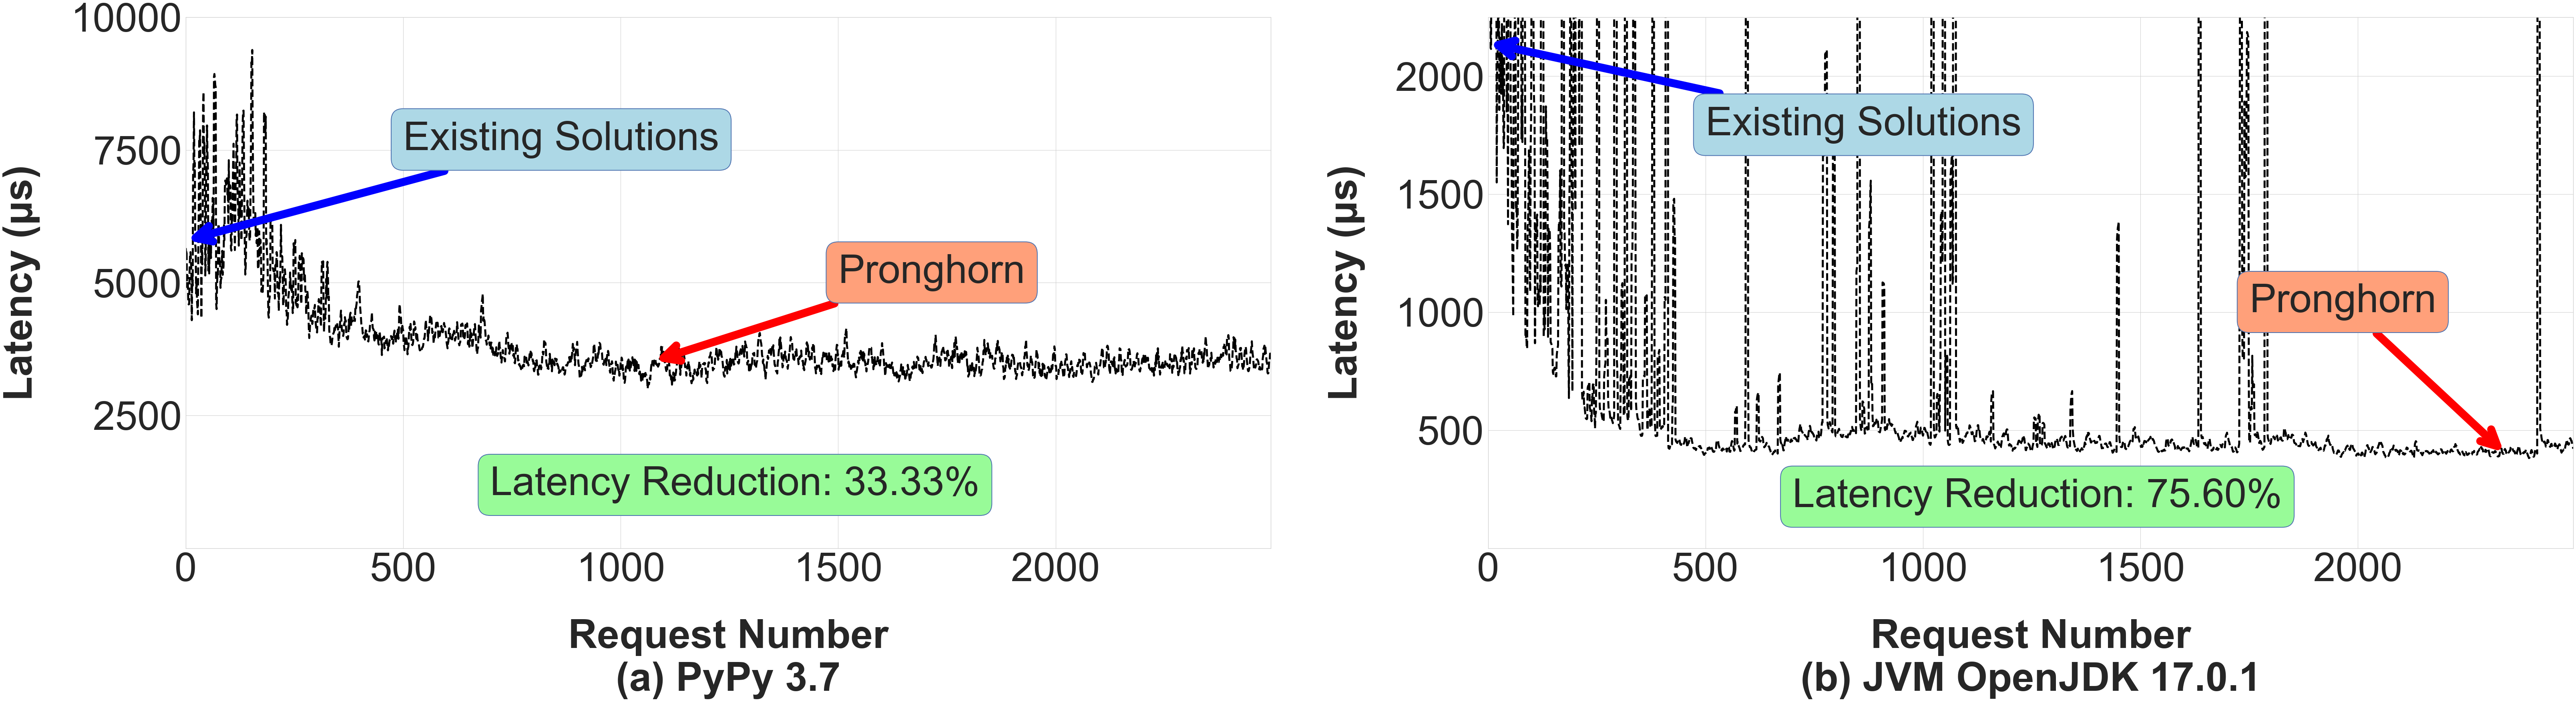

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn aesthetics
sns.set(style="whitegrid")

# Setting figure and axis objects
fig, axes = plt.subplots(1, 2, figsize=(90, 25))

# Configuring font size
font_size = 100

# Creating line plots
lineplot1(axes[0], range(0, 2496), pypy_convolved, "Request Number\n(a) PyPy 3.7", "Latency (μs)")
lineplot2(axes[1], range(0, 2496), jvm_convolved, "Request Number\n(b) JVM OpenJDK 17.0.1", "Latency (μs)")

# Defining box style for annotation
bbox_props_ext = dict(boxstyle="round,pad=0.3", fc="lightblue", ec="b", lw=2)
bbox_props_prng = dict(boxstyle="round,pad=0.3", fc="lightsalmon", ec="b", lw=2)
bbox_props_diff = dict(boxstyle="round,pad=0.3", fc="palegreen", ec="b", lw=2)

pypy_convolved_median = np.median(pypy_convolved[1:101])
jvm_convolved_median = np.median(jvm_convolved[1:101])

pypy_convolved_median_end = np.median(pypy_convolved[967:977])
jvm_convolved_median_end = np.median(jvm_convolved[2237:2337])

# Calculate the percentage differences
difference_pypy = 33.33
difference_jvm = 75.60

# Adding annotations with description
axes[0].annotate('Existing Solutions', xy=(1, pypy_convolved_median), 
                 xytext=(500, 7500), 
                 arrowprops=dict(arrowstyle='->', lw=20, color='blue'),
                 fontsize=font_size,
                 bbox=bbox_props_ext)
axes[0].annotate('Pronghorn', xy=(1077, pypy_convolved_median_end), 
                 xytext=(1500, 5000), 
                 arrowprops=dict(arrowstyle='->', lw=20, color='red'),
                 fontsize=font_size,
                 bbox=bbox_props_prng)
axes[0].annotate(f'Latency Reduction: {difference_pypy:.2f}%', xy=(500, 7500), 
                 xytext=(700, 1000),
                 fontsize=font_size,
                 bbox=bbox_props_diff)

axes[1].annotate('Existing Solutions', xy=(1, jvm_convolved_median), 
                 xytext=(500, 1750), 
                 arrowprops=dict(arrowstyle='->', lw=20, color='blue'),
                 fontsize=font_size,
                 bbox=bbox_props_ext)
axes[1].annotate('Pronghorn', xy=(2337, jvm_convolved_median_end), 
                 xytext=(1750, 1000), 
                 arrowprops=dict(arrowstyle='->', lw=20, color='red'),
                 fontsize=font_size,
                 bbox=bbox_props_prng)
axes[1].annotate(f'Latency Reduction: {difference_jvm:.2f}%', xy=(1250, 175), 
                 xytext=(700, 175),
                 fontsize=font_size,
                 bbox=bbox_props_diff)

# Label settings
axes[0].set_xlabel("Request Number\n(a) PyPy 3.7", fontsize=font_size)
axes[0].set_ylabel("Latency (μs)", fontsize=font_size)
axes[1].set_xlabel("Request Number\n(b) JVM OpenJDK 17.0.1", fontsize=font_size)
axes[1].set_ylabel("Latency (μs)", fontsize=font_size)

# Tick settings
for ax in axes:
    ax.tick_params(axis="x", labelsize=font_size)
    ax.tick_params(axis="y", labelsize=font_size)
    ax.margins(x=0)

# Adjust layout
fig.tight_layout(pad=2.5)
plt.subplots_adjust(wspace=0.2)

# Save the figure
plt.savefig("pypy_time.pdf", bbox_inches='tight')
